In [1]:
using QuantumOptics
using PyPlot

The complete Hamiltonian is 
$$\hat{H} = \frac{1}{2}\hbar \omega_0\sigma_3 + \hbar \omega a^\dagger a + \hbar\lambda(\sigma_+ + \sigma_-)(a+a^\dagger)
$$

Using the RWA, ie. dropping out the values which rotate faster in case of resonance $\omega = \omega_0$, we get

$$ \hat{H}_{JC} = \frac{1}{2}\hbar \omega_0\sigma_3 + \hbar \omega a^\dagger a + \hbar\lambda(\sigma_+a + \sigma_-a^\dagger) $$


$$ \sigma_+ = |e\rangle \langle g|$$  

$$ \sigma_- = |g\rangle \langle e|$$

$$ \sigma_3 = |e\rangle \langle e| - |g\rangle \langle g|$$

$$ [\sigma_+,\sigma_-] = \sigma_3$$


### A continuación se escriben los valores que se usarán próximamente, así como las bases y los operadores fundamentales

In [2]:
ω_C = 2*π       #Cavity Frecuency
ω_A = 2*π       #Atom Frecuency
g = 2*π*0.05    #Coupling Strength
#g = 1
κ = 0.005        #Cavity Dissipation Rate
γ = 0.05        #Atom Dissipation Rate
N = 15          #Number of Cavity Fock States



########################


# Bases
# Definimos las bases en las que trabajaremos. Al final tomamos el producto tensorial para general la base general. 

b_fock = FockBasis(N)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin


########################

# Fundamental operators

a = destroy(b_fock)   #La función destroy : Annihilation operator for the given Fock space 
at = create(b_fock)   #La función create: Creation operator for the given Fock space.
n = number(b_fock)    # number : Number operator for the given Fock space 



sm = sigmam(b_spin)   
sp = sigmap(b_spin)   
sz = sigmaz(b_spin)

Hatom = ω_A*sz/2  # Sección del Hamiltoniano relacionado con el átomo 
Hfield = ω_C*at*a #Probaremos si cambiando n = at*a cambia el asunto.     
Hint = g*(at⊗sm + a⊗sp)

Hint_2 = g*(at⊗sm + a⊗sp + at⊗sp + a⊗sm)

H = identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint

#El siguiente Hamiltoniano no toma encuentra RWA

H_2 = identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint_2;

#Tiempo
T = Array(linspace(0,100,1000));  

#### Una pregunta que surgió fue si los estados iniciales estaban ya normalizados. A continuación lo verificamos.

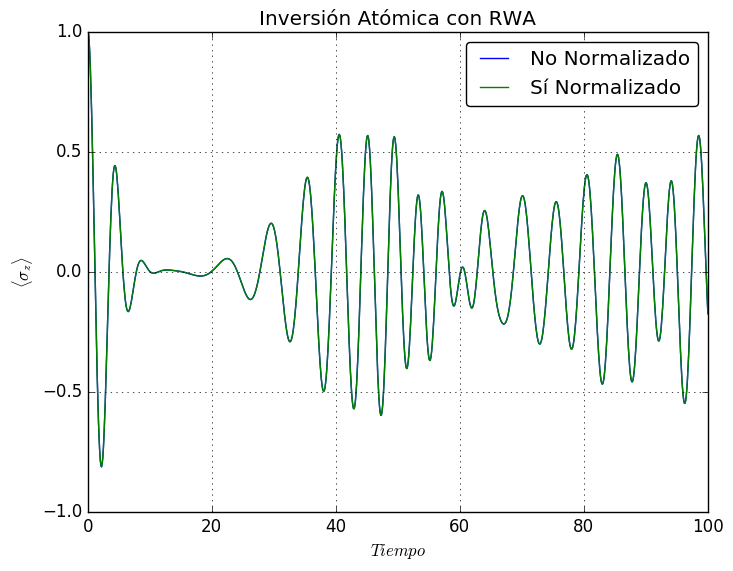

PyObject <matplotlib.text.Text object at 0x7f2ee165d470>

In [4]:
#Caso No Normalizado
ψ_inicial_1 =(coherentstate(b_fock, 2) ⊗ (spinup(b_spin)))

#Caso Normalizado
ψ_inicial_2 =normalize!(coherentstate(b_fock, 2) ⊗ (spinup(b_spin)))

tout, ψ_tiempo_1 = timeevolution.schroedinger(T, ψ_inicial_1, H)

tout, ψ_tiempo_2 = timeevolution.schroedinger(T, ψ_inicial_2, H);

expec_sz_1 = expect(identityoperator(b_fock) ⊗ sz, ψ_tiempo_1)

expec_sz_2 = expect(identityoperator(b_fock) ⊗ sz, ψ_tiempo_2);

plot(T, expec_sz_1, label = "No Normalizado")
plot(T, expec_sz_2, label = "Sí Normalizado")

legend(loc="upper right",fancybox="true")
grid("on")

xlabel(L"Tiempo")
ylabel(L"\langle \sigma_z \rangle")
title("Inversión Atómica con RWA")

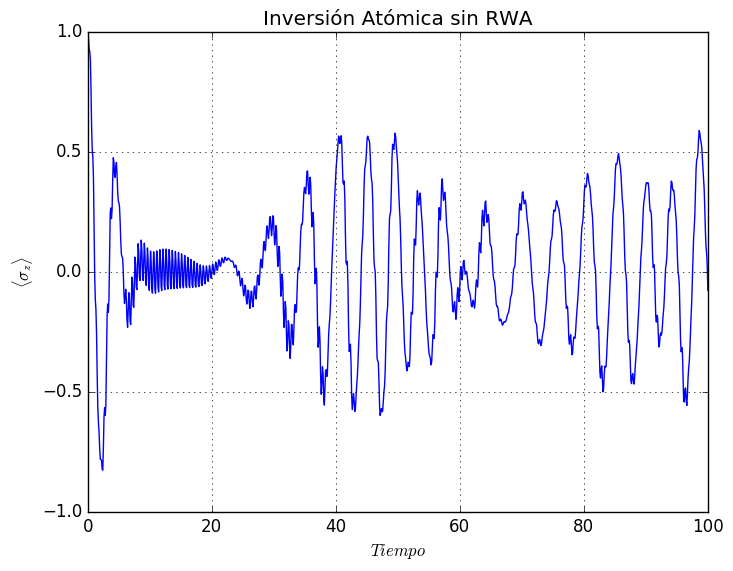

PyObject <matplotlib.text.Text object at 0x7f2eded4c128>

In [5]:
ψ_inicial_3 = coherentstate(b_fock, 2) ⊗ spinup(b_spin)
tout, ψ_tiempo_3 = timeevolution.schroedinger(T, ψ_inicial_3, H_2)
expec_sz_3 = expect(identityoperator(b_fock) ⊗ sz, ψ_tiempo_3)

plot(T,expec_sz_3)
grid("on")

xlabel(L"Tiempo")
ylabel(L"\langle \sigma_z \rangle")
title("Inversión Atómica sin RWA")

Lossy Jaynes-Cummings model
---------------------------

The Jaynes-Cummings model can be expanded by giving the 2 level atom a finite spontenous decay rate $\gamma$. The system is then an open quantum system which is described by a master equation of the form

$$
    \dot{\rho} = -\frac{i}{\hbar} \big[H,\rho\big]
                 + \sum_i \big(
                        J_i \rho J_i^\dagger
                        - \frac{1}{2} J_i^\dagger J_i \rho
                        - \frac{1}{2} \rho J_i^\dagger J_i
                    \big)
$$

where in this case there is only one jump operator $J_{2}=\sqrt{\gamma} \sigma_-$.

In [7]:
psi0 =(coherentstate(b_fock, 1) ⊗ (spinup(b_spin))) #Estado Inicial
J = [sqrt(γ)*identityoperator(b_fock) ⊗ sm] ;

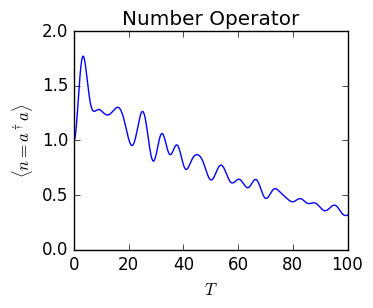

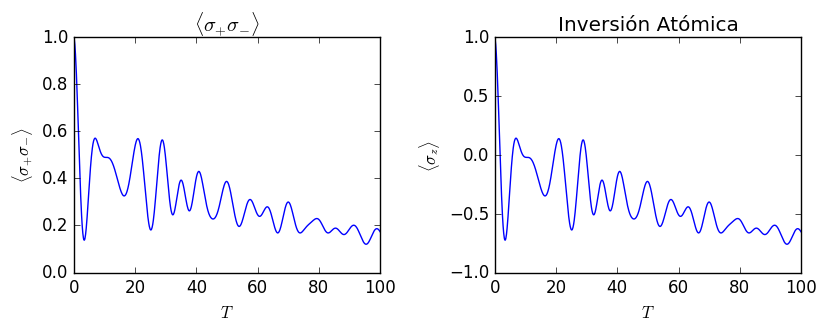

In [9]:
# Master

sx = sp*sm

tout, ρt = timeevolution.master(T, psi0, H, J)  #ya no usamos la función anterior. Aquí utilizamos master.

exp_n_master = expect(at*a ⊗ identityoperator(b_spin), ρt) 
exp_sz_master = expect(identityoperator(b_fock) ⊗ sz, ρt)
exp_sx_master = expect(identityoperator(b_fock) ⊗ sx, ρt)


figure(figsize=(12,6))
subplot(2,3,1)
ylim([0, 2])
plot(T, exp_n_master);
xlabel(L"T")
title("Number Operator")
ylabel(L"\langle n = a^\dagger a \rangle")

figure(figsize=(12,6))
subplot(2,3,2)
ylim([0, 1])
plot(T, exp_sx_master);
xlabel(L"T")
title(L"\langle \sigma_{+}\sigma_{-} \rangle")
ylabel(L"\langle \sigma_{+}\sigma_{-} \rangle")

subplot(2,3,3)
ylim([-1, 1])
plot(T, exp_sz_master);
xlabel(L"T")
title("Inversión Atómica")
ylabel(L"\langle \sigma_z \rangle");

tight_layout();

### With Dissipation con $J_1$ y $J_2$
$$
\dot{\rho} = -\frac{i}{\hbar}[H_{JC},\rho]+ \mu\bigg[a\rho a^\dagger-\frac{1}{2}(a^\dagger a \rho + \rho a^\dagger a )\bigg]+ 
\nu\bigg[a^\dagger \rho a - \frac{1}{2}(aa^\dagger \rho + \rho aa^\dagger)\bigg]
$$

Tomamos entonces $J_1 = \sqrt{\gamma} \sigma_{-} $ y $J_2 = \sqrt{\kappa} \sigma_{+}$

In [10]:
J_1 = [sqrt(γ)*identityoperator(b_fock) ⊗ sm]
J_2 = [sqrt(κ)*identityoperator(b_fock) ⊗ sp];

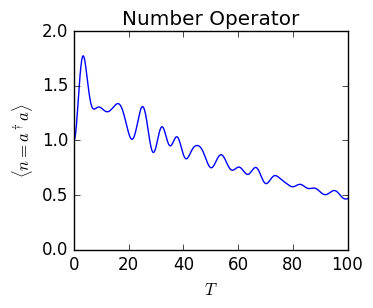

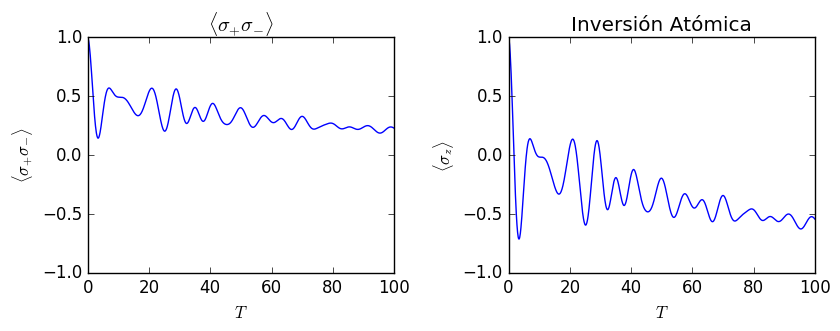

In [13]:
tout, ρtotal = timeevolution.master(T, psi0, H, J_1+J_2)

exp_n_master_2 = expect(at*a ⊗ identityoperator(b_spin), ρtotal) 
exp_sz_master_2 = expect(identityoperator(b_fock) ⊗ sz, ρtotal)
exp_sx_master_2 = expect(identityoperator(b_fock) ⊗ sx, ρtotal)

figure(figsize=(12,6))
subplot(2,3,1)
ylim([0, 2])
plot(T, exp_n_master_2);
xlabel(L"T")
title("Number Operator")
ylabel(L"\langle n = a^\dagger a \rangle")

figure(figsize=(12,6))
subplot(2,3,2)
ylim([-1, 1])
plot(T, exp_sx_master_2);
xlabel(L"T")
title(L"\langle \sigma_{+}\sigma_{-} \rangle")
ylabel(L"\langle \sigma_{+}\sigma_{-} \rangle")

subplot(2,3,3)
ylim([-1, 1])
plot(T, exp_sz_master_2);
xlabel(L"T")
title("Inversión Atómica")
ylabel(L"\langle \sigma_z \rangle");

tight_layout();

## Dos Átomos Jaynes-Cummings

$$ H_F = \hbar \omega_0 \hat{n} h(\hat{n}) $$

$$ H_A = \frac{\hbar \omega}{2}(\sigma_z^{(1)} + \sigma_z^{(2)}) $$

$$ H_{FA} = \hbar g \sum_{i=1}^2 (\sigma_{+}^{(i)} \hat{a} f(\hat{n}) + \sigma_{-}^{(i)} f(\hat{n}) \hat{a}^\dagger ) $$

$$ H_{AA} = 2 \hbar \kappa (\sigma_{-}^{(1)}\sigma_{+}^{(2)} + \sigma_{+}^{(1)}\sigma_{-}^{(2)}) + \hbar J \sigma_{z}^{(1)}\sigma_{z}^{(2)} $$

$$ H = H_F + H_A + H_{FA} + H_{AA} $$

Esto lo obtuvimos del paper https://arxiv.org/pdf/1607.03216v1.pdf

### Definimos ahora los operadores de transición atómica

In [21]:
sm_1 = sigmam(b_spin) ⊗ identityoperator(b_spin)
sm_2 = identityoperator(b_spin) ⊗ sigmam(b_spin)
sp_1 = sigmap(b_spin) ⊗ identityoperator(b_spin)
sp_2 = identityoperator(b_spin) ⊗ sigmap(b_spin)  
sz_1 = sigmaz(b_spin) ⊗ identityoperator(b_spin)
sz_2 = identityoperator(b_spin) ⊗ sigmaz(b_spin)
Dz = (1/2)*(sz_1 + sz_2)
Sx = (1/2)*(sp_1*sm_1 + sp_2*sm_2);

In [15]:
# Hamiltoniano

H_field = ω_C*at*a
H_atom = (ω_A/2)*(sz_1 + sz_2)
H_field_atom = g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2)
H_atom_atom = 2*κ*(sm_1*sp_2 + sp_1*sm_2) + γ*sz_1*sz_2

H_1 = H_field ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin)
H_2 = identityoperator(b_fock) ⊗ H_atom
H_3 = H_field_atom  
H_4 = identityoperator(b_fock) ⊗ H_atom_atom

H = H_1 + H_2 + H_3 + H_4

#Tiempo
tiempo = Array(linspace(0,100,1000));

### A continuación se presentarán distintos casos del estado inicial.

In [38]:
# spinup y spindown

ψ_inicial_up_down = coherentstate(b_fock, 1) ⊗ (spinup(b_spin)) ⊗ (spindown(b_spin))

tout, ψ_evol_up_down = timeevolution.schroedinger(tiempo, ψ_inicial_up_down, H)

expec_Dz_1_up_down = expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_up_down)
#expec_sz_2_up_down = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_up_down)
expec_n_up_down = expect(at*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_up_down)
expec_sx_up_down = expect(identityoperator(b_fock) ⊗ Sx, ψ_evol_up_down)
;

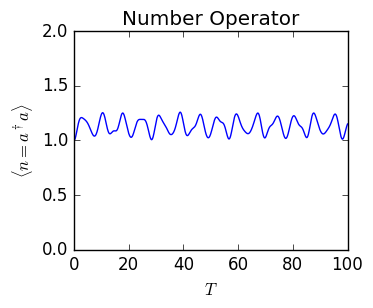

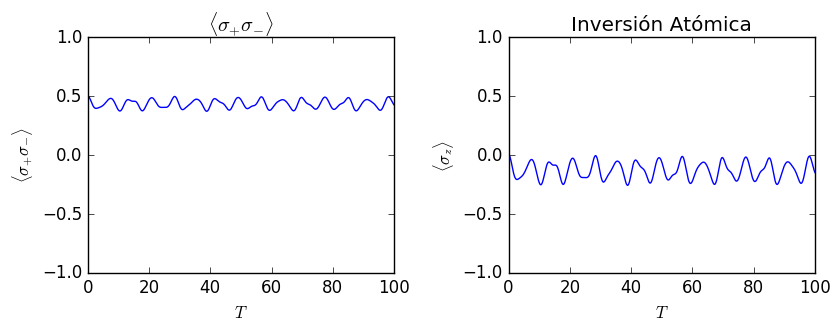

In [39]:

figure(figsize=(12,6))
subplot(2,3,1)
ylim([0, 2])
plot(tiempo, expec_n_up_down);
xlabel(L"T")
title("Number Operator")
ylabel(L"\langle n = a^\dagger a \rangle")

figure(figsize=(12,6))
subplot(2,3,2)
ylim([-1, 1])
plot(tiempo, expec_sx_up_down);
xlabel(L"T")
title(L"\langle \sigma_{+}\sigma_{-} \rangle")
ylabel(L"\langle \sigma_{+}\sigma_{-} \rangle")

subplot(2,3,3)
ylim([-1, 1])
plot(tiempo, expec_Dz_1_up_down);
xlabel(L"T")
title("Inversión Atómica")
ylabel(L"\langle \sigma_z \rangle");

tight_layout();

#### Spin Up & Up

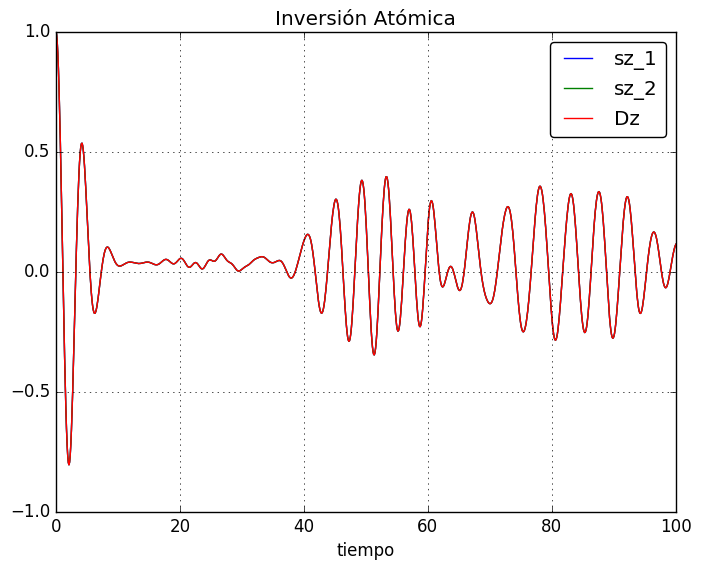

PyObject <matplotlib.legend.Legend object at 0x7f2ed7d90e10>

In [97]:
# spinup y spinup. Éste es el que usan en el paper. 

ψ_inicial_up_up = coherentstate(b_fock, 2) ⊗ (spinup(b_spin)) ⊗ (spinup(b_spin))

tout, ψ_evol_up_up = timeevolution.schroedinger(tiempo, ψ_inicial_up_up, H)

expec_sz_1_up_up = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_up_up)
expec_sz_2_up_up = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_up_up)
expec_n_up_up = expect(at*a/2 ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_up_up)
expec_dz_up_up = expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_up_up)
expec_sx_up_up = expect(identityoperator(b_fock) ⊗ Sx, ψ_evol_up_up)

plot(tiempo, expec_sz_1_up_up, label = "sz_1")
plot(tiempo, expec_sz_2_up_up, label = "sz_2")
#plot(tiempo, expec_n_up_up, label = "n")
plot(tiempo, expec_dz_up_up, label = "Dz")

title("Inversión Atómica")
xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")

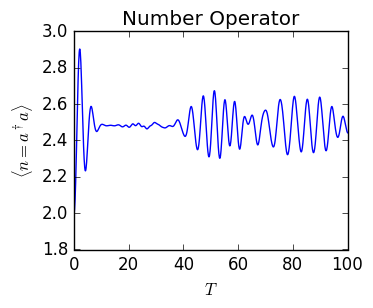

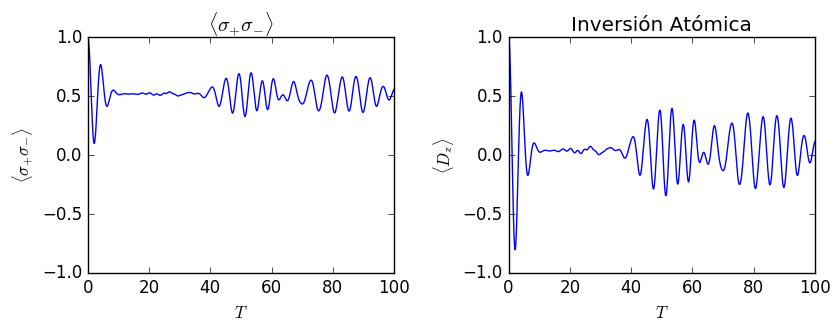

In [101]:

figure(figsize=(12,6))
subplot(2,3,1)
#ylim([0, 2])
plot(tiempo, expec_n_up_up);
xlabel(L"T")
title("Number Operator")
ylabel(L"\langle n = a^\dagger a \rangle")

figure(figsize=(12,6))
subplot(2,3,2)
ylim([-1, 1])
plot(tiempo, expec_sx_up_up);
xlabel(L"T")
title(L"\langle \sigma_{+}\sigma_{-} \rangle")
ylabel(L"\langle \sigma_{+}\sigma_{-} \rangle")

subplot(2,3,3)
ylim([-1, 1])
plot(tiempo, expec_dz_up_up);
xlabel(L"T")
title("Inversión Atómica")
ylabel(L"\langle D_z \rangle");

tight_layout();

### Spin Down & Up

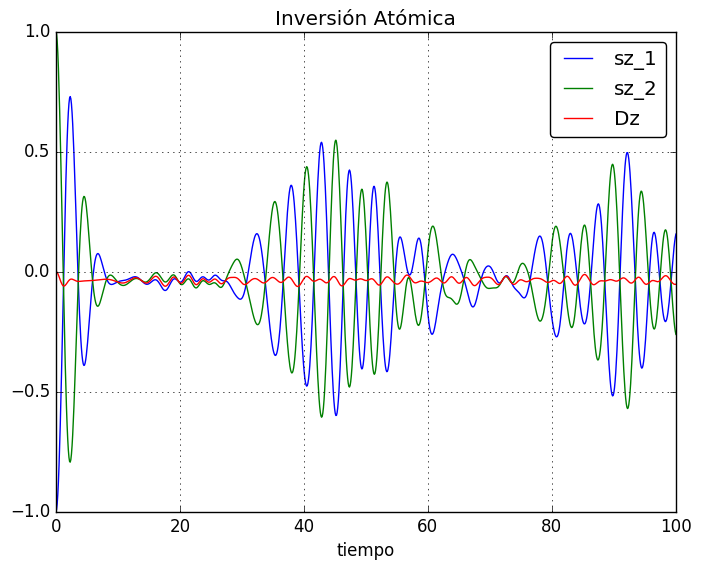

PyObject <matplotlib.legend.Legend object at 0x7f2ed7c9b588>

In [104]:
# spindown y spinup

ψ_inicial_down_up = coherentstate(b_fock, 2) ⊗ (spindown(b_spin)) ⊗ (spinup(b_spin))

tout, ψ_evol_down_up = timeevolution.schroedinger(tiempo, ψ_inicial_down_up, H)

expec_sz_1_down_up = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_down_up)
expec_sz_2_down_up = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_down_up)
expec_n_down_up = expect(at*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_down_up)
expec_dz_down_up = expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_down_up)
expec_sx_down_up = expect(identityoperator(b_fock) ⊗ Sx, ψ_evol_down_up)

plot(tiempo, expec_sz_1_down_up, label = "sz_1")
plot(tiempo, expec_sz_2_down_up, label = "sz_2")
plot(tiempo, expec_dz_down_up, label = "Dz")

xlabel("tiempo")
grid("on")
title("Inversión Atómica")
legend(loc="upper right",fancybox="true")

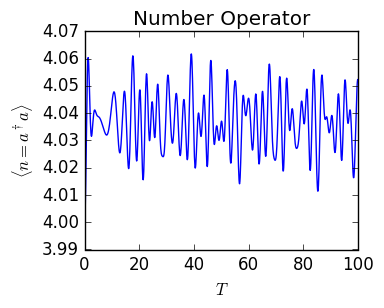

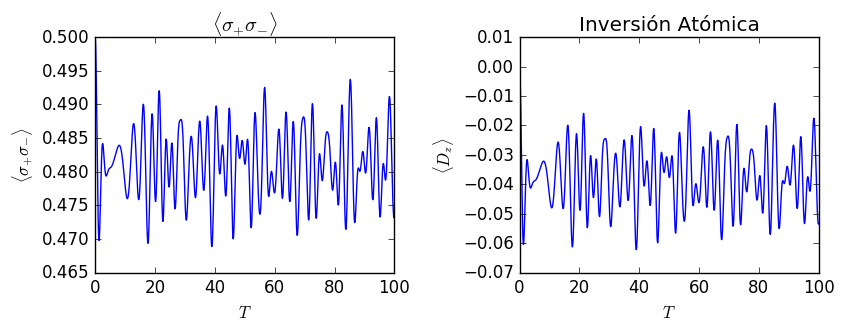

In [105]:

figure(figsize=(12,6))
subplot(2,3,1)
#ylim([0, 2])
plot(tiempo, expec_n_down_up);
xlabel(L"T")
title("Number Operator")
ylabel(L"\langle n = a^\dagger a \rangle")

figure(figsize=(12,6))
subplot(2,3,2)
#ylim([-1, 1])
plot(tiempo, expec_sx_down_up);
xlabel(L"T")
title(L"\langle \sigma_{+}\sigma_{-} \rangle")
ylabel(L"\langle \sigma_{+}\sigma_{-} \rangle")

subplot(2,3,3)
#ylim([-1, 1])
plot(tiempo, expec_dz_down_up);
xlabel(L"T")
title("Inversión Atómica")
ylabel(L"\langle D_z \rangle");

tight_layout();

#### Spin Down & Down

In [106]:
# spindown y spindown

ψ_inicial_down_down = coherentstate(b_fock, 2) ⊗ (spindown(b_spin)) ⊗ (spindown(b_spin))

tout, ψ_evol_down_down = timeevolution.schroedinger(tiempo, ψ_inicial_down_down, H)

expec_sz_1_down_down = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_down_down)
expec_sz_2_down_down = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_down_down)
expec_n_down_down = expect(at*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_down_down)
expec_sx_down_down = expect(identityoperator(b_fock) ⊗ Sx, ψ_evol_down_down)
expec_dz_down_down = expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_down_down)

#plot(tiempo, expec_sz_1_down_down, label = "sz_1")
#plot(tiempo, expec_sz_2_down_down, label = "sz_2")
#plot(tiempo, expec_dz_down_down, label = "Dz")
#plot(tiempo, expec_n_down_down, label = "n")

#xlabel("tiempo")
#grid("on")
#legend(loc="upper right",fancybox="true")

;

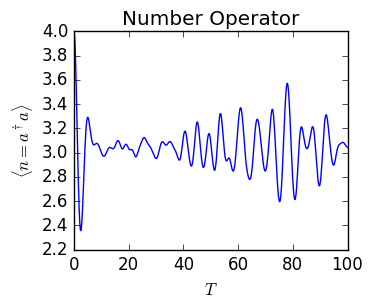

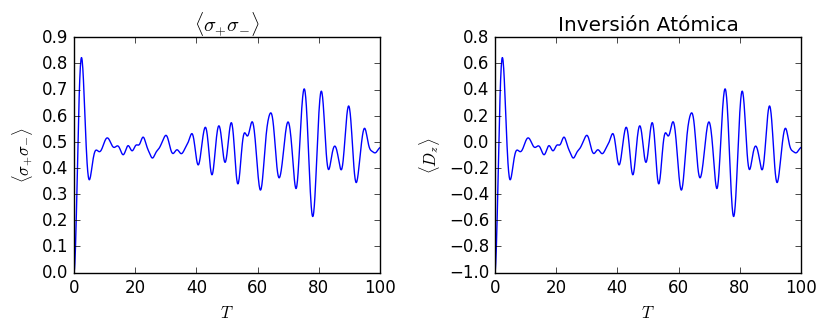

In [107]:

figure(figsize=(12,6))
subplot(2,3,1)
#ylim([0, 2])
plot(tiempo, expec_n_down_down);
xlabel(L"T")
title("Number Operator")
ylabel(L"\langle n = a^\dagger a \rangle")

figure(figsize=(12,6))
subplot(2,3,2)
#ylim([-1, 1])
plot(tiempo, expec_sx_down_down);
xlabel(L"T")
title(L"\langle \sigma_{+}\sigma_{-} \rangle")
ylabel(L"\langle \sigma_{+}\sigma_{-} \rangle")

subplot(2,3,3)
#ylim([-1, 1])
plot(tiempo, expec_dz_down_down);
xlabel(L"T")
title("Inversión Atómica")
ylabel(L"\langle D_z \rangle");

tight_layout();

#### Usando el estado 

$$|\psi(0)\rangle = \frac{1}{\sqrt{2}} ( |n+1,g,e\rangle + |n,e,g\rangle) $$

In [108]:
ψ_inicial_combinacion = (1/(sqrt(2)))*(ψ_inicial_up_down + ψ_inicial_down_up)

tout, ψ_evol_combinacion = timeevolution.schroedinger(tiempo, ψ_inicial_combinacion, H)

expec_sz_1_combinacion = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_combinacion)
expec_sz_2_combinacion = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_combinacion)
expec_n_combinacion = expect(at*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_combinacion)
expec_sx_combinacion = expect(identityoperator(b_fock) ⊗ Sx, ψ_evol_combinacion)
expec_dz_combinacion = expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_combinacion)

#plot(tiempo, expec_sz_1_combinacion, label = "sz_1")
#plot(tiempo, expec_sz_2_combinacion, label = "sz_2")
#plot(tiempo, expec_n_combinacion, label = "n")

#title("Inversión Atómica")
#xlabel("tiempo")
#grid("on")
#legend(loc="upper right",fancybox="true")
#ylabel(L"\langle \sigma_z \rangle")

;

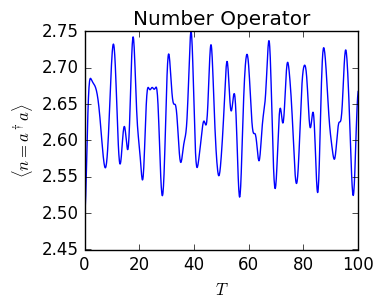

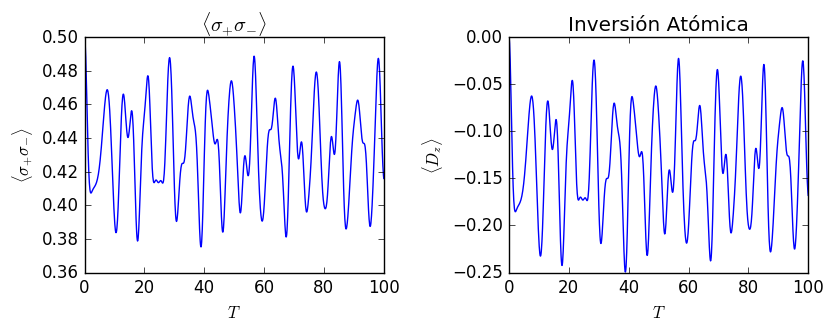

In [109]:

figure(figsize=(12,6))
subplot(2,3,1)
#ylim([0, 2])
plot(tiempo, expec_n_combinacion);
xlabel(L"T")
title("Number Operator")
ylabel(L"\langle n = a^\dagger a \rangle")

figure(figsize=(12,6))
subplot(2,3,2)
#ylim([-1, 1])
plot(tiempo, expec_sx_combinacion);
xlabel(L"T")
title(L"\langle \sigma_{+}\sigma_{-} \rangle")
ylabel(L"\langle \sigma_{+}\sigma_{-} \rangle")

subplot(2,3,3)
#ylim([-1, 1])
plot(tiempo, expec_dz_combinacion);
xlabel(L"T")
title("Inversión Atómica")
ylabel(L"\langle D_z \rangle");

tight_layout();

### Comparación 

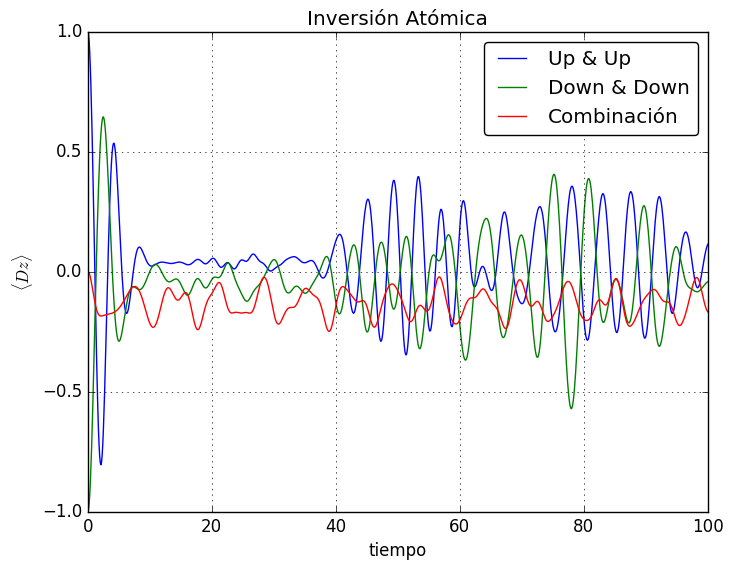

PyObject <matplotlib.legend.Legend object at 0x7f2ed7aa5b70>

In [110]:
expec_up_up = (expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_up_up))
expec_down_down = (expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_down_down))
expec_combinacion = (expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_combinacion))

plot(tiempo, expec_up_up, label = "Up & Up")
plot(tiempo, expec_down_down, label = "Down & Down")
plot(tiempo, expec_combinacion, label = "Combinación")

xlabel("tiempo")
title("Inversión Atómica")
ylabel(L"\langle Dz \rangle")
grid("on")
legend(loc="upper right",fancybox="true")

## Cambiamos ahora la constante de acoplamiento para un átomo

In [82]:
g_coupling = [2*π*i for i in linspace(0,1,50)]  

Hint_coupling = [g*(at⊗sm + a⊗sp) for g in g_coupling]
H_coupling = [identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint for Hint in Hint_coupling] 

psi0 =(coherentstate(b_fock, 2) ⊗ (spinup(b_spin)))

psi_coupling_evol =  [timeevolution.schroedinger(T,psi0,H) for H in H_coupling]

expecto = []
for i in 1:length(H_coupling)
    tout, psi_coupling_evol = timeevolution.schroedinger(T,psi0,H_coupling[i])
    push!(expecto, expect(identityoperator(b_fock) ⊗ sz, psi_coupling_evol))
end
return expecto

50-element Array{Any,1}:
 Complex{Float64}[0.999995+0.0im,0.999995+0.0im,0.999995+0.0im,0.999995+0.0im,0.999994+0.0im,0.999994+0.0im,0.999994+0.0im,0.999994+0.0im,0.999994+0.0im,0.999994+0.0im  …  0.999843+0.0im,0.999843+0.0im,0.999843+0.0im,0.999842+0.0im,0.999842+0.0im,0.999842+0.0im,0.999842+0.0im,0.999842+0.0im,0.999842+0.0im,0.999842+0.0im]                       
 Complex{Float64}[0.999995+0.0im,0.998348+0.0im,0.993413+0.0im,0.98521+0.0im,0.97377+0.0im,0.959135+0.0im,0.941363+0.0im,0.920521+0.0im,0.896688+0.0im,0.869955+0.0im  …  0.567584+0.0im,0.57025+0.0im,0.571365+0.0im,0.570918+0.0im,0.568901+0.0im,0.565313+0.0im,0.560155+0.0im,0.553435+0.0im,0.545164+0.0im,0.535357+0.0im]                          
 Complex{Float64}[0.999995+0.0im,0.993414+0.0im,0.97377+0.0im,0.941364+0.0im,0.896688+0.0im,0.840423+0.0im,0.773422+0.0im,0.696698+0.0im,0.611404+0.0im,0.51882+0.0im  …  0.353151+0.0im,0.330633+0.0im,0.304321+0.0im,0.274456+0.0im,0.241318+0.0im,0.205228+0.0im,0.166541+0.0im,0.125648

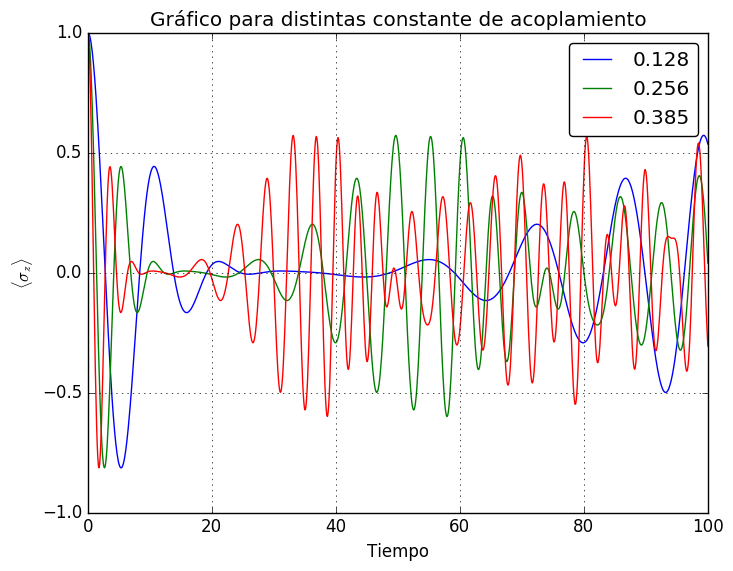

PyObject <matplotlib.text.Text object at 0x7f2eda922358>

In [83]:
for i in 2:4
    plot(T,expecto[i], label = round(g_coupling[i],3))
end

grid("on")
legend(loc="upper right",fancybox="true")
ylabel(L"\langle \sigma_z \rangle")
xlabel("Tiempo")
title("Gráfico para distintas constante de acoplamiento")

## Cambiamos ahora la constante de acoplamiento para dos átomos

In [84]:
g_coupling = [2*π*i for i in linspace(0,1,100)]  

Hint_coupling_two = [g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2) for g in g_coupling]

H_coupling_two = [H_1 + H_2 + H_4 + H_field_atom for H_field_atom in Hint_coupling_two]

H_ground = [groundstate(H_coupling[i]) for i in 1:length(H_coupling)]

H_ground_2 = [groundstate(H_1 + H_2 + H_4 + g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2)) for g in g_coupling]

100-element Array{QuantumOptics.states.Ket,1}:
 QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[2.10014e-16+1.07852e-16im,-8.51096e-17+3.17934e-16im,-1.65342e-16-6.02077e-16im,-0.315598+0.948893im,6.63395e-17+1.56698e-16im,1.13401e-17-1.31186e-16im,1.45616e-16-4.67063e-17im,4.54794e-16-6.94825e-16im,-6.5189e-17+4.78323e-17im,-1.69805e-16-1.84822e-16im  …  -1.51438e-17+4.05011e-19im,-4.94617e-18-1.61732e-17im,1.0469e-17+7.88582e-18im,-2.85893e-17-2.51618e-18im,2.9644e-17-1.89909e-17im,-3.67776e-17+2.05634e-17im,1.55466e-17-3.51744e-18im,-1.23171e-17-1.86973e-19im,8.32926e-18+1.47705e-17im,5.76272e-18-7.42912e-19im])     
 QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics

In [85]:
psi_coupling_evol_up_up =  [timeevolution.schroedinger(tiempo,ψ_inicial_up_up,H) for H in H_coupling_two]

100-element Array{Tuple{Array{Float64,1},Array{QuantumOptics.states.Ket,1}},1}:
 ([0.0,0.1001,0.2002,0.3003,0.4004,0.500501,0.600601,0.700701,0.800801,0.900901  …  99.0991,99.1992,99.2993,99.3994,99.4995,99.5996,99.6997,99.7998,99.8999,100.0],QuantumOptics.states.Ket[QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[0.135335+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.270671+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.382786+0.0im,0.0+0.0im  …  0.0+0.0im,0.0+0.0im,0.00750977+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.00387803+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im]),QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[0.109039-0.0801637im,0.0+0.0im,0.

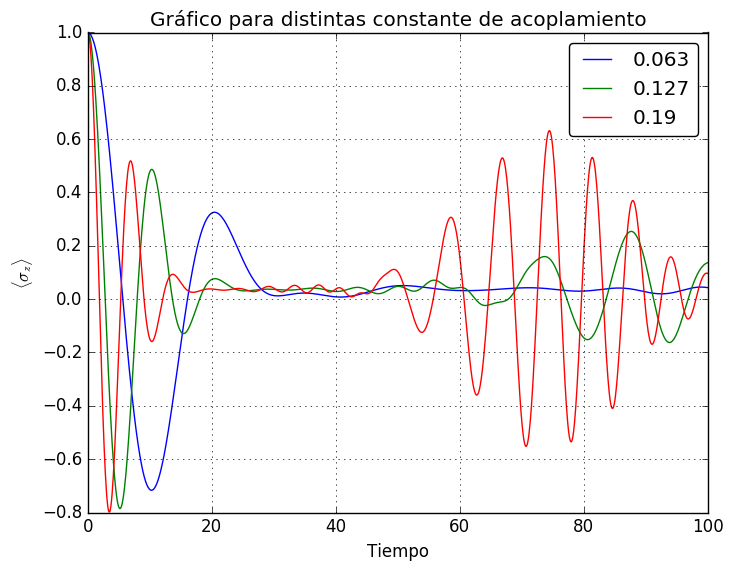

PyObject <matplotlib.text.Text object at 0x7f2eda8632e8>

In [86]:
expecto_two = []
for i in 1:length(H_coupling_two)
    tout, psi_coupling_evol_up_up = timeevolution.schroedinger(tiempo, ψ_inicial_up_up, H_coupling_two[i])
    push!(expecto_two, expect(identityoperator(b_fock) ⊗ Dz, psi_coupling_evol_up_up))
end
return expecto_two

for i in 2:4
    plot(tiempo,expecto_two[i], label = round(g_coupling[i],3))
    #plot(T,expecto[i], label = round(g_coupling[i],3))
end

grid("on")
legend(loc="upper right",fancybox="true")
ylabel(L"\langle \sigma_z \rangle")
xlabel("Tiempo")
title("Gráfico para distintas constante de acoplamiento")

### Población del estado base en función de la constante de acoplamiento para un átomo 

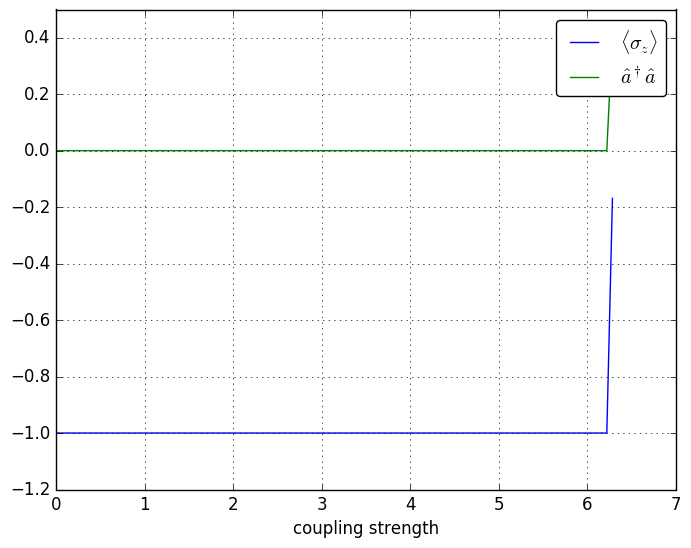

PyObject <matplotlib.legend.Legend object at 0x7f2ed7fe8400>

In [88]:
Hint_coupling = [g*(at⊗sm + a⊗sp) for g in g_coupling]
H_coupling = [identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint for Hint in Hint_coupling]
H_ground = [groundstate(H_coupling[i]) for i in 1:length(H_coupling)]

g_state_sz = []
g_state_n = []

for i in 1:length(H_coupling)
    push!(g_state_sz, expect(identityoperator(b_fock) ⊗ sz, H_ground[i]))
    push!(g_state_n, expect(at*a ⊗ identityoperator(b_spin), H_ground[i]))
end
return (g_state_sz)
return real(g_state_n)

plot(g_coupling, real(g_state_sz), label = L"\langle \sigma_z \rangle")
plot(g_coupling, g_state_n, label = L"\hat{a}^\dagger \hat{a}")


xlabel("coupling strength")
grid("on")
ylim(-1.2, 0.5)
legend(loc="upper right",fancybox="true")

In [91]:
### Población del estado base en función de la constante de acoplamiento para dos átomos

In [92]:
Hint_coupling_two = [g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2) for g in g_coupling]

H_coupling_two = [H_1 + H_2 + H_4 + H_field_atom for H_field_atom in Hint_coupling_two]

H_ground = [groundstate(H_coupling[i]) for i in 1:length(H_coupling)]

H_ground_2 = [groundstate(H_1 + H_2 + H_4 + g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2)) for g in g_coupling]

100-element Array{QuantumOptics.states.Ket,1}:
 QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[3.58138e-17-2.96154e-18im,-3.13308e-16+1.0148e-16im,-5.96536e-18+3.12481e-17im,0.571549+0.820568im,-2.14277e-18+2.02056e-18im,-3.86989e-17-6.35326e-17im,5.14837e-17+3.05981e-17im,-1.19653e-16+5.22096e-18im,-1.58966e-17-1.53623e-17im,1.80683e-19+4.17991e-17im  …  4.36786e-18-1.35267e-17im,1.53914e-17-2.06959e-17im,2.46502e-17+3.16983e-17im,-1.58795e-17+2.51711e-18im,-1.85651e-19+1.8425e-18im,3.45482e-20-1.64893e-18im,-3.72448e-17-2.781e-17im,-4.03443e-17+6.08897e-17im,-2.01746e-18+4.80842e-17im,2.11069e-17+1.82115e-17im]) 
 QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spi

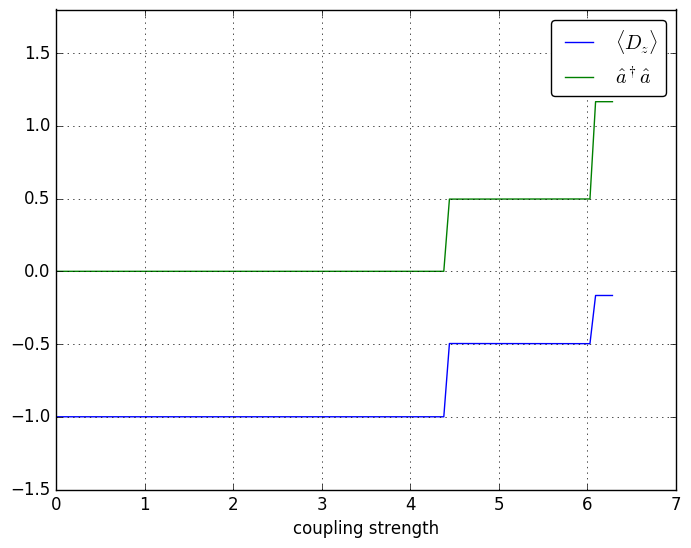

PyObject <matplotlib.legend.Legend object at 0x7f2edadd8ac8>

In [93]:
g_state_sz_two = []
g_state_n_two = []
for i in 1:length(H_ground_2)
    push!(g_state_sz_two, expect(identityoperator(b_fock) ⊗ Dz, H_ground_2[i]))
    push!(g_state_n_two, expect(at*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), H_ground_2[i]))
end


plot(g_coupling, g_state_sz_two, label = L"\langle D_z \rangle")
plot(g_coupling, g_state_n_two, label = L"\hat{a}^\dagger \hat{a}")


xlabel("coupling strength")
grid("on")
ylim(-1.5, 1.8)
legend(loc="upper right",fancybox="true")

## Versión Analítica un átomo

$$
W(t) = e^{-\vec{n}} \sum_{n=0}^\infty \frac{\vec{n}^n}{n!}cos (2gt\sqrt{n+1})
$$
$$
W(t) = e^{-\vec{n}} \sum_{n=0}^\infty \frac{\vec{n}^n}{n!}cos (\Omega_n t)
$$

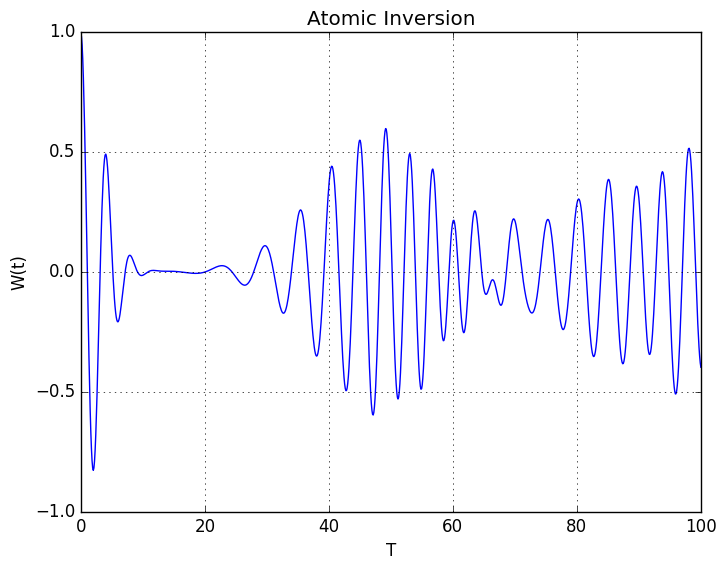

PyObject <matplotlib.text.Text object at 0x7f2edacf0278>

In [96]:
function atom_inv(η,T)
    g = 2*π*0.05    #Coupling Strength
    # η es el average photon number
    arr = [] #Generamos un arreglo vacío, para luego insertarle los términos que serán sumados.
    
    for n in linspace(0,100,100)        
        push!(arr,((η^n)/factorial(n))*cos(2*g*T*sqrt(n+1)))
    end
    sum(arr)*exp(-η) #sumamos el arreglo antes generado y multiplicamos la exp. 
end

time = linspace(0,100,1000)
atom = [atom_inv(5,i) for i in time]
plot(time, atom)

title("Atomic Inversion")
grid("on")
xlabel("T")
ylabel("W(t)")

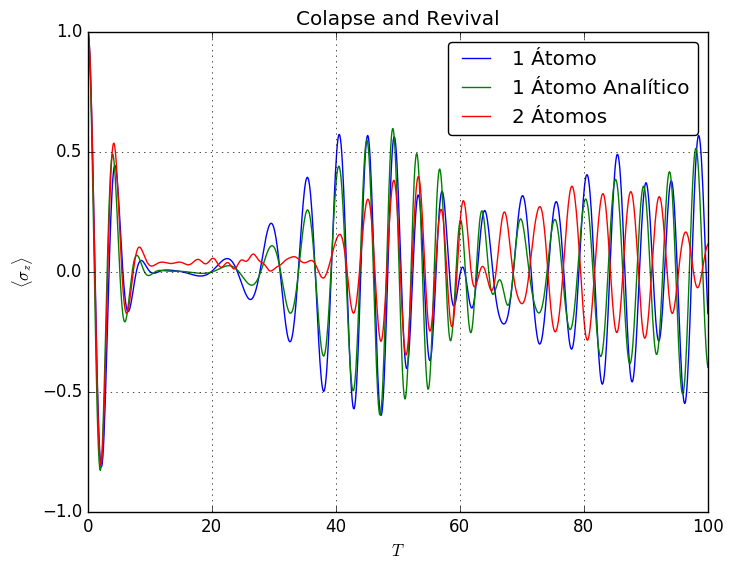

PyObject <matplotlib.legend.Legend object at 0x7f2ed7e41a90>

In [95]:
plot(T,expec_sz_2, label = "1 Átomo")
plot(time, atom, label = "1 Átomo Analítico")
plot(tiempo, expec_up_up, label = "2 Átomos")


title("Colapse and Revival")
grid("on")
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle")
legend(loc="upper right",fancybox="true")